# MSDS 430 Module 9 Python Assignment

<div class="alert alert-block alert-warning"><b>In this assignment you will read through this notebook then complete the exercises. Once you are satisfied with your results, submit your notebook and html file to Canvas. Your files should include all output, i.e. run each cell and save your files before submitting.</b></div>

<div class="alert alert-block alert-info">

## Introduction to Images using Python

Images are used in a number of different areas in Data Science which include facial recognition, object recognition, x-ray analysis, image classification and navigation.<br>

The objectives of the topic this week is to serve as a foundational introduction to using Python with images.  The objectives are:
- To understand how an image is formed by pixels.
- To see how the combination of red, green and blue control the color of a pixel in an RGB color scheme.
- To read in an image and use numpy ndarray (fixed size multidimensional container) to manipulate an image
  - will manipulate color
  - will rotate image
  - will isolate portions of image
  - will create gray scale of image
- To become familiar with the Pillow and OpenCV libraries
</div>

<div class="alert alert-block alert-danger"><b>In many of the problems you will see <font color=black>#TODO</font> statements added as comments on the code cell provided. You will want to be sure to complete each of these as indicated to avoid losing points.</b></div>

### References 

__[How to Work With Images](https://www.blog.pythonlibrary.org/2021/09/14/python-101-how-to-work-with-images/)__

__[Python Image Manipulation Tools](https://opensource.com/article/19/3/python-image-manipulation-tools)__

__[Importing Image Data Into Numpy Arrays](https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays)__

__[Image Processing](https://scipy-lectures.org/advanced/image_processing/)__

In [ ]:
# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

If you do not have Pillow or opencv installed, you will need to run the following two cells first.

In [ ]:
#!pip install Pillow

In [ ]:
# pip install opencv-python

In [ ]:
# import libraries needed
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm #use for colors
from pylab import imread
from PIL import Image, ImageOps, ImageFilter
import cv2 

## Color - Red, Green and Blue (RGB)
(reference: https://en.wikipedia.org/wiki/Color)

Let's start out with the basics of images and see how the combination of red, green and blue (RGB) creates specific colors.
- A pixel is the smallest logical unit in digital graphics.  Pixels are combined to create images, video and digital displays. 
- A pixel will get its color from a combination of RGB.

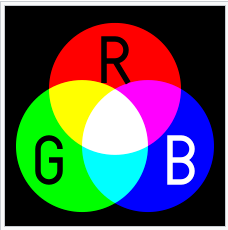

- A color image can be converted to a 3D-array with shape `(x, y, 3)` which indicates that the 3D-array contains `x` 2D-arrays and each 2D-array contains `y` 1D-arrays and each 1D-array has size `3` (i.e., a triple of numbers from 0 to 255). Geometrically, we represent a color image as a`x` by `y` grid of pixels and each pixel consists of three numbers from 0 to 255. The first number denotes the intensity of the red color, the second number the intensity of the green color and the third number the intensity of the blue color.**

- An array of all zeros [0,0,0] will generate an image with all pixels black. 
- An array of all max numbers, [255,255,255] will generate an image with all pixels white.
- In the grid below, the (1,1) pixel is yellow and has the values of RGB of [255,255,0].

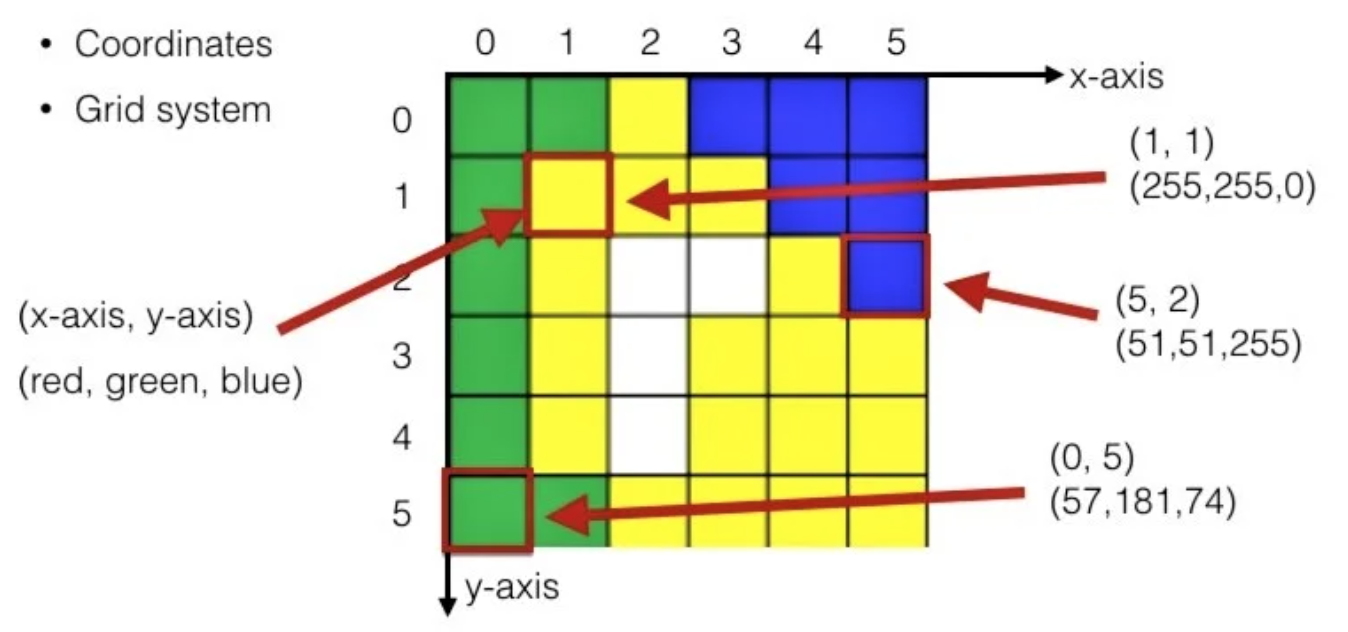
(Reference: __[Introduction to Digital Images](https://web.stanford.edu/class/cs101/image-1-introduction.html)__)

## Creating a color image

- When you run the cell below, the combination of red = 0, green = 0 and blue = 255 results in the blue color. Makes sense!<br>
- Change the values for red, green and blue to make your own colors.
- The minimum value for color is 0 and the max is 255.<br>

In [ ]:
# change settings for new color
red = 0
green = 0
blue = 255

# Create a square of 15 rows and 15 columns (pixels)  
# The 3 is the size of the third dimension of the array: (r,g,b)
color_test = np.zeros(shape=(15, 15, 3))  

# position 0 is red, 1 is green and 2 is blue
color_test[:,:,0] = red     # assign the value of red to all the values in pixel position 0
color_test[:,:,1] = green   # assign the value of green to all the values in pixel position 1
color_test[:,:,2] = blue    # assign the value of green to all the values in pixel position 2

plt.imshow(color_test/255);

Notice above that we divided `color_test` by 255 and used this to display the image. The reason this is done is because the object `color_test` is dtype of float which does not correctly reflect an image. So we need to scale this by either dividing by 255 or by changing the object to a uint8 dtype.<br>
To change the object type we could replace the last line of code with the following:
```python
color_test = color_test.astype('uint8')
plt.imshow(color_test);
```

### Changing the color of a pixel
- A pixel is small, square and only contains one color.
- The one color of the pixel is created by the combination of values in R, G and B.<br>
- The blue square we created contains 15 x 15 pixels; we can change the value of one pixel (run cell below).
- Our blue square is an xy grid where x increases going to the right and y increases from top to bottom. You can see that the very top left of our blue square has the position of 0,0.
- In the cell below we are changing the pixel at position 5,5,1 to a value of 255.  The pixel at 5,5 is an array with the three color values in positions 0 (red), 1 (green) and 2 (blue).  We are changing the pixel at 5,5 to have a 1 (green) value of 255 which creates an aqua pixel.<br>

```python
color_test[5,5,1] = 255
```


In [ ]:
color_test[5,5,1] = 255 # add in green to create an aqua pixel

plt.imshow(color_test/255)  

We can also try other colors for the 5,5 pixel. To create a magenta pixel, we would have to rerun the solid blue cell that we created initially. Then run the following code:
```python
color_test[5,5,0] = 255
plt.imshow(color_test/255)
```

Below we are looking at three distinct pixels to see the breakdown of R, G, B at the 0,0 position, the 5,5 position, and the 14,0 position. The first and last of those are all blue with no red or green. The pixel at position 5,5 is the one we changed above.

In [ ]:
# here we are looking at 3 individual pixels - R, G, B
color_test[0,0,:]
color_test[5,5,:]
color_test[14,0,:]

An image is represented in Python by a numpy array. A grayscale image is represented by a 2D-array, while a color image is represented by a 3D-array. For a color image each pixel is then a list of three values - the Red value, the Green value, and the Blue value. The values for and mixture of these three colors then specify the final color that should appear in the pixel (if there are more than three then the image is using a colorscheme that is not RGB). 


## Loading an image into a nympy array

Next we will read in a photo using `imread()` from pylab. The photo is of a vegetable stand at a market. Note: The photos used in this assignment for demonstration purposes are copyright free from __[Pexels](https://www.pexels.com/)__.

In [ ]:
# read in image
veggies = imread('pexels-maria-orlova-4946998.jpg')

# this code will display the image within Jupyter Notebook
plt.imshow(veggies)

In this next code cell we take a closer look at the structure and makeup of `veggies`.
- Using the method above, the photo is read into a `type` called numpy ndarray.
  - An ndarray is a fixed-size multidimensional container of items of the same type and size.
- Our `veggies` photo has the `shape` of 1856 rows (height in pixels) by 2784 columns (width in pixels) with 3 colors (depth or color channel).
- The `dtype` of the object is uint8 (unsigned integer 8 bit) which allows a range of values from 0 to 255.
- The `array` displayed from the last line of code below shows the color for each pixel that makes up the image. This lists the R, G, B values for each pixel starting at the 0,0 position working across row 0 and ending with the last row and the 1855,2783 position.

In [ ]:
print("---------- type of object ----------")
type(veggies)
print("---------- shape of object ----------")
veggies.shape
print("---------- data type of object ----------")
veggies.dtype
print("---------- values within object ----------")
veggies

Now let's take a look at four specific pixels and display their color values.

In [ ]:
# color values of the first 3 pixels of row 0
veggies[0,0,:]
veggies[0,1,:]
veggies[0,2,:]

# color values of the last pixel of row 0
y = veggies.shape[1] - 1  # get the y coordinates of the pixel's position  
print('Last y coordinate is: ', y)
veggies[0, y, :]

## Using Matplotlib

Matplotlib uses the `viridis` color palette as the default:

<br>

Below you can see when R, G, B colors are isolated with the default color palette.


In [ ]:
# have 3 subplots for separating colors
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
colors = [cm.Reds, cm.Greens, cm.Blues]
header = ['Red only', 'Green only', 'Blue only']

for i in range(3): 
    ax[i].imshow(veggies[:,:,i])
    ax[i].set_title(header[i])
    
plt.show()

# show unaltered picture
plt.imshow(veggies);

To really see each layer of color, we can change the Matplotlib color map (cm) to match.

In [ ]:
# have 3 subplots for separating colors
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
colors = [cm.Reds, cm.Greens, cm.Blues]
header = ['Red only', 'Green only', 'Blue only']

for i in range(3): 
    ax[i].imshow(veggies[:,:,i], cmap = colors[i])
    ax[i].set_title(header[i])
    
plt.show()

# show unaltered picture
plt.imshow(veggies);


## Selecting a portion of the image by specifying the ranges of rows and columns

We could plot only a portion of the image (using the built-in slicing) 

In [ ]:
# show the lower left corner of the photo
plt.imshow(veggies[1000:1750, 0:1200, :]);

And here is another example of isolating only a portion of the image.

In [ ]:
# show the upper right corner of the photo with all colors
plt.imshow(veggies[250:800, 2000:2800, :]);

If we want this to be a new image, we can simply save this to a new object.

In [ ]:
# you can save the portion of the image to a new object
sunflowers = veggies[250:800, 2000:2800, :]
plt.imshow(sunflowers)

<div class="alert alert-block alert-success"><b>Problem 1 (2 pts.)</b>: There are two signs in the 'veggies' image we have been using as an example.  Use the slicing method demonstrated above to isolate the sign that appears towards the center left in the image and starts with 'Poiveons Rouge'. Display your new image with just the sign.

</div>

In [ ]:
#Todo: Isolate and display the sign from 'veggies' that reads 'Poiveons Rouge...'
plt.imshow(veggies[750:1050, 700:1050, :])


## Manipulate image

This next example adds a red bar down the middle of the image. The bar runs from rows 100 to 1750 (most of the height of the photo) and is 100 units wide from column 1400 to 1500 (approximately the center of the photo). Feel free to adjust the width, height or both to see how this changes the size and location of the bar.

In [ ]:
# can alter pic by adding a line
temp = veggies.copy()

temp[100:1750, 1400:1500, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(temp);

In [ ]:
# load in new image for another example
balloons = imread('pexels-tabitha-mort-693490.jpg')
plt.imshow(balloons );

In [ ]:
# take a portion of an image
small = balloons [1500:2800,800:2200,:]
small.shape

plt.imshow(small)

Note that in the example below we are taking a portion of one balloon and adding it back into the photo in a new location.  Also note that the pixels in both sides of the equation are matching in size.

In [ ]:
# and overlay it onto the orginal image
b3 = balloons.copy()
b3[500:1700,0:1400,:] = small[0:1200,0:1400,:]
plt.imshow(b3)

<div class="alert alert-block alert-success"><b>Problem 2 (6 pts.)</b>: There are three people in the image - two males and a female. You are to switch the two male heads. Hint - create two image objects containing the heads as the same size as this can make it less complicated to switch.

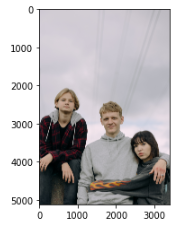
    

    
 </div>

In [ ]:
# this cell is provided for you and reads in the image for this problem
p2 = imread('pexels-cottonbro-7243967.jpg')
plt.imshow(p2);

In [ ]:
# Todo - isolate one head and display the image
plt.imshow(p2[2050:2900, 350:1100, :])

In [ ]:
# Todo - isolate the second head and display the image
plt.imshow(p2[2450:3300, 1500:2250, :])

In [ ]:
# Todo - swap the heads and display the new image
p3 = p2.copy()
p3[2450:3300, 1500:2250, :] = p2[2050:2900, 350:1100, :]
p3[2050:2900, 350:1100, :] = p2[2450:3300, 1500:2250, :]
plt.imshow(p3)

## Grayscale

The most familiar grayscale image is an xray.  

In [ ]:
# test using code from tutorial
# https://numpy.org/numpy-tutorials/content/tutorial-x-ray-image-processing.html
xray = imread('xray_test.png')

plt.imshow(xray, cmap="gray")
plt.axis("off")
plt.show()

## Grayscale continued
There are a number of ways to create a grayscale image. One way is shown below using a grayscale conversion formula.  There are a few interesting factors about this conversion:<br><br>
- Note that each of the colors is multiplied by a number and then added all together. This results in one color value per pixel!<br>
- The first cell below shows the conversion and the grayscale image.<br>
- The second cell below shows that the resulting object is a two dimensional array (1856, 2784) and that each pixel (as shown per x,y) has only one number for the grayscale.<br>

source: __[Convert Image to Grayscale in Python](https://www.delftstack.com/howto/python/convert-image-to-grayscale-python/)__
<font>

In [ ]:
# gray scale conversion
gray = veggies.copy()
R, G, B = gray[:,:,0], gray[:,:,1], gray[:,:,2]
imGray = 0.2989 * R + 0.5870 * G + 0.1140 * B 
plt.imshow(imGray, cmap='gray')
plt.show()

In [ ]:
# two dimensional array
imGray.shape
# one color per pixel
imGray

As you might expect, we can also flip our photo vertically or horizontally, or both. This next example flips the photo along the vertical axis. In the example following this, our photo is flipped along the horizontal axis.

In [ ]:
# flip along the vertical axis; first make a copy of the image
flipv = veggies.copy()

flipv.shape # 1856 height, 2784 width
# goal is to flipv on y axis 

# get counter from shape 
num = flipv.shape[1] - 1 #adjust for zero offset
print(f'x axis goes from 0 to {num}')

for i in range(0,num):
    #print('i is: ',i)
    # take what is in position 2782 and move it to 0, etc
    flipv[:,i,:] = veggies[:,num-i,:]

plt.imshow(flipv)

In [ ]:
# flip along the horizontal axis; first make a copy of the image
fliph = veggies.copy()

fliph.shape  

# get counter from shape tuple to int
num = fliph.shape[0] - 1
print(num)

for i in range(0,num):
    #print('i is: ',i)
    fliph[i,:,:] = veggies[num-i,:,:]

plt.imshow(fliph)

Let's use the balloons image for the next homework problem.

In [ ]:
#balloons = imread('pexels-tabitha-mort-693490.jpg')
plt.imshow(balloons);

<div class="alert alert-block alert-success"><b>Problem 3 (4 pts.)</b>: Perform both a vertical and horizontal flip using <b>balloons</b>. Display the new images, which should look like this:
    
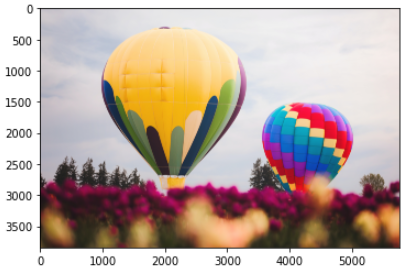
    
 </div>

<div class="alert alert-block alert-success"><b>And like this:</b> 
    
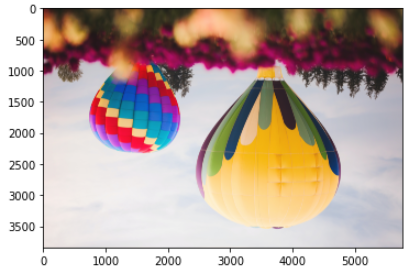

    
 </div>

In [ ]:
# Todo: Flip along the vertical axis and show image

horb = balloons.copy()

num = horb.shape[1] - 1

for i in range(0,num):
    horb[:,i,:] = balloons[:,num-i,:]

plt.imshow(horb)

In [ ]:
# Todo: Flip along the horizontal axis and show image
flipb = balloons.copy()

num = flipb.shape[0] - 1

for i in range(0,num):
    flipb[i,:,:] = balloons[num-i,:,:]

plt.imshow(flipb)

## Pillow library
___________________________________________________


The Python Pillow Library is a fork of an older library called PIL that was only supported in Python 2 and has since been discontinued. Pillow provides image processing features that are similar to Photoshop, such as:

- Cropping
- Applying filters
- Adding borders
- Resizing


First, let's open our veggies image with Pillow. Notice when this next cell is run, the image will open up as a .png file in a different window.

Notice when you run the following cell the image pops up in a different window as a png file.</font>

In [ ]:
pil_veg = Image.open('pexels-maria-orlova-4946998.jpg')

# note opens image up as .png in a different window
pil_veg.show()

In [ ]:
# can display in JN just by using the object name
pil_veg

In [ ]:
# use pyplot to display in Jupyter Notebook
plt.imshow(pil_veg)

In [ ]:
# show info about image
print(f'The width of the image is {pil_veg.width} and the height is {pil_veg.height}.')
print(f'Image format is:{pil_veg.format}')
print(f'Image size is:{pil_veg.size}')
print(f'Image mode is:{pil_veg.mode}')

We can add a border to the image using `ImageOps.expand()`. Feel free to try different border sizes and colors.

In [ ]:
# add a border
test_border = ImageOps.expand(pil_veg, border = 100, fill = 'red')
plt.imshow(test_border)
#test_border.show()

We can also resize the image to any size. Here we change the image from 2784x1856 to 300x300.

In [ ]:
# resize image
test_size = pil_veg.resize((300,300))
plt.imshow(test_size)
#test_size.show()

Pillow uses a Cartesian pixel coordinate system with (0,0) representing the upper left corner of the image. These coordinates refer to the implied pixel corners so the center of a pixel addressed as (0,0) would actually lie at (0.5,0.5).<br><br>
Coordinates are usually passed to the library as 2-tuples (x,y). Rectangles are represented as 4-tuples with the upper left corner given first. For example, a rectangle covering all of an 800x600 pixel image is written as (0,0,800,600).<br><br>

__[Pillow Handbook](https://pillow.readthedocs.io/en/latest/handbook/index.html)__

In this next example we crop the photo to show only the sunflowers towards the upper right of the original image. In terms of an array, this runs approximately from rows 300 to 750 and columns 2300 to 2784. Notice the difference now that the Cartesian-like coordinate system is being used instead of an array.

In [ ]:
# note that the x,y coordinates with Pillow is different than using an array
subTest = pil_veg.crop((2300, 300, 2784, 750))

#subTest.show()
plt.imshow(subTest)
# can save new image
subTest.save('testcrop.jpg')

<div class="alert alert-block alert-success"><b>Problem 4 (5 pts.)</b>: Find your own image from your personal photos or from a copyright free website like Pexels.
    
- Read in the image using Pillow.
- Display your image. 
- Crop the photo to only show an interesting portion of it that is approximately 500x500. 
- Also, add a border to your cropped image (any color and width).
- Display your image with the border.</div>

In [ ]:
# Todo: Read in your image using Pillow
personal_image = Image.open('personal_image.jpeg')
# note opens image up as .png in a different window
personal_image

In [ ]:
# Todo: Crop the photo to display an interesting section approaximately 500x500
width, height = personal_image.size
personal_cropped=personal_image.crop((3350, 1150, 3850, 1650))

# Todo: Display the cropped image
plt.imshow(personal_cropped)

In [ ]:
# Todo: Add a border to the cropped image
personal_border = ImageOps.expand(personal_cropped, border = 20, fill = 'blue')
# Todo: Display the image with your border
plt.imshow(personal_border)

### Pillow Filters

Pillow has many filters built in that we can use to edit the look of our image. Currently, those filters are:

* Blur
* Contour
* Detail
* Edge_Enhance
* Edge_Enhance_More
* Emboss
* Find_Edges
* Sharpen
* Smooth
* Smooth_More

For more information on each these, refer to __[Python Pillow - Adding Filters to an Image](https://www.tutorialspoint.com/python_pillow/python_pillow_adding_filters_to_an_image.htm)__

This next example embosses our sunflower image so that it provides a relief view. The example following that provides a contour. And the last example for the filters shows the use of BLUR.

In [ ]:
subTest_emboss = subTest.filter(ImageFilter.EMBOSS)
plt.imshow(subTest_emboss)

In [ ]:
subTest_contour = subTest.filter(ImageFilter.CONTOUR)
plt.imshow(subTest_contour)

In [ ]:
# normal sunflowers
subTest

In [ ]:
# using BLUR
subTest.filter(ImageFilter.BLUR)

## OpenCV (Open Source Computer Vision)

__[OpenCV Tutorial](https://www.geeksforgeeks.org/opencv-python-tutorial/)__

You will notice that when you open the file with cv2 and display using Matplotlib, you get an image showing BGR format.  This is because cv2 uses BGR and Matplotlib uses RGB.

__[OpenCV Documentation](https://docs.opencv.org/4.6.0/)__

In [ ]:
veg = cv2.imread('pexels-maria-orlova-4946998.jpg')
#cv2.imshow("original", veg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(veg)

This can be fixed by specifying the colormap to use by using a cv2 function.

In [ ]:
plt.imshow(cv2.cvtColor(veg, cv2.COLOR_BGR2RGB))

In [ ]:
print("---------- type of object ----------")
type(veg)
print("---------- shape of object ----------")
veg.shape
print("---------- data type of object ----------")
veg.dtype
print("---------- values within object ----------")
veg


In [ ]:
# rotate the image
h, w = veg.shape[:2]
rot_matrix = cv2.getRotationMatrix2D((w/2,h/2), -180, 1)
rot_image = cv2.warpAffine(veg, rot_matrix, (w, h))
plt.imshow(cv2.cvtColor(rot_image, cv2.COLOR_BGR2RGB))

In [ ]:
# can save out a file
filename = 'savedtest.jpg'
cv2.imwrite(filename, rot_image)

In [ ]:
# create a border
window_name = 'Image'
# value is color of border
vegborder = cv2.copyMakeBorder(veg, 30, 30, 30, 30, cv2.BORDER_CONSTANT, None, value = (0,0,255))
#cv2.imshow(window_name, vegborder)
#cv2.waitKey(0)
plt.imshow(cv2.cvtColor(vegborder, cv2.COLOR_BGR2RGB))

<div class="alert alert-block alert-success"><b>Problem 5 (5 pts.)</b>: Using your original photo from Problem 4 and the OpenCV library, draw an arrow on your picture. It can be any size, thickness and color.
</div>

Refer to __[OpenCV Drawing and Arrow](https://www.geeksforgeeks.org/python-opencv-cv2-arrowedline-method/)__ for more information.

In [ ]:
# Todo: Display your original image from Problem 4 but read in by cv2. Be sure to display in Jupyter Notebook with RGB.
per = cv2.cvtColor(cv2.imread('personal_image.jpeg'), cv2.COLOR_BGR2RGB)
plt.imshow(per)

In [ ]:
# Todo: Draw an arrow on your image
start_point = (3300, 550)
end_point = (3550, 1100)
color = (355, 355, 355)
thickness = 30
per_arrow = cv2.arrowedLine(per, start_point, end_point, color, thickness)

# Todo: Display the new image with the arrow in Jupyter Noteook.
plt.imshow(per_arrow)

## Bonus section:
--------------------------------------

The code below shows additional ways to work with images.  This section is bonus code and optional for you to become familiar with at this time.

In [ ]:
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_clip_path.html#sphx-glr-gallery-images-contours-and-fields-image-clip-path-py
import matplotlib.patches as patches
image = balloons.copy()
fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((1560,2000), radius=1200, transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
plt.show()

And now let's plot the row average (or said another way, what is color usage as a function of the row)

In [ ]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(figsize=(5,3))
for i in range(3):
    ax.plot(veggies.mean(axis=1)[:, i], color=colors[i], linewidth=1.5);
ax.set_xlabel('Row index')
ax.set_ylabel('Color intensity')
ax.legend(loc='best')

So we can see that at the top of the image there is a majority of blue - which corresponds with what we see (the blue background dominates the image).

What about if we plot color intensity as a function of the column?

In [ ]:
#Plot color intensity as a function of the column

colors = ['r', 'g', 'b']
fig, ax = plt.subplots(figsize=(5,3))
for i in range(3):
    ax.plot(veggies.mean(axis=0)[:, i], color=colors[i], linewidth=1.5)
ax.set_xlabel('Column index')
ax.set_ylabel('Color intensity')
ax.legend(loc='best')

We can also swap RGB colors in the image using the approach here:  

In [ ]:
swap = veggies.copy()

temp1 = swap[:,:,0]
temp2 = swap[:,:,1]
temp3 = swap[:,:,2]

swap[:,:,0] = temp3  # red is replaced with blue
swap[:,:,2] = temp1  # blue is replaced with red


plt.imshow(swap)
